In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import subprocess
import sys

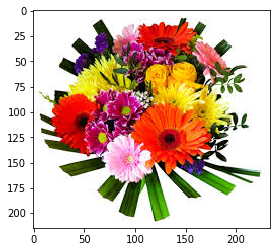

In [60]:
img = mpimg.imread('flowers.jpg')

# greyimg = -np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])

plt.imshow(img)
plt.show()

In [3]:
greyimg.shape
# np.array(greyimg)
# print(greyimg[200])

(250, 300)

In [6]:
# np.array(img)
# print(img)

In [4]:
#get an array of rgb values
#use seperate channels for positive, negative or ground
#e.g. red -> positive boundaries, green -> negative boundaries, blue -> grounded boundaries
#for every pixel, have to take one of the rgb channels to denote its potential
#so discarding 2 of the channels which should be 0
#but have to treat the positive [0,1] values differently to set positive or negative potentials
# print(img[:,:,0])

Vmax = 100
V_red = Vmax*(1-img[:,:,0])
V_green = -Vmax*(1-img[:,:,1])
V_blue = 0*img[:,:,2]


print(V_green)

[[-8.62745094 -8.62745094 -8.62745094 ..., -8.62745094 -8.62745094
  -8.62745094]
 [-8.62745094 -8.62745094 -8.62745094 ..., -8.62745094 -8.62745094
  -8.62745094]
 [-8.62745094 -8.62745094 -8.62745094 ..., -8.62745094 -8.62745094
  -8.62745094]
 ..., 
 [-8.62745094 -8.62745094 -8.62745094 ..., -8.62745094 -8.62745094
  -8.62745094]
 [-8.62745094 -8.62745094 -8.62745094 ..., -8.62745094 -8.62745094
  -8.62745094]
 [-8.62745094 -8.62745094 -8.62745094 ..., -8.62745094 -8.62745094
  -8.62745094]]


In [2]:
img = mpimg.imread("problemB.png")
print(img[:2])

[[[ 0.          0.          0.53333336  1.        ]
  [ 0.          0.          0.53333336  1.        ]
  [ 0.          0.          0.53333336  1.        ]
  ..., 
  [ 0.          0.          0.53333336  1.        ]
  [ 0.          0.          0.53333336  1.        ]
  [ 0.          0.          0.53333336  1.        ]]

 [[ 0.          0.          0.53333336  1.        ]
  [ 0.          0.          0.53333336  1.        ]
  [ 0.          0.          0.53333336  1.        ]
  ..., 
  [ 0.          0.          0.53333336  1.        ]
  [ 0.          0.          0.53333336  1.        ]
  [ 0.          0.          0.53333336  1.        ]]]


In [99]:
#setup the maximum voltage in the provided image
#then use the values in the greyscale image
#to scale the initial potential values relative to the max
#noting that whiter -> higher scaling factor, reverse this by scaling by (1 - image value)
#so the principal is that whitespace in the image is at 0
Vmax = 100
potential = Vmax*(1-greyimg)

In [123]:
print(len(potential[:,0])) #leftmost column
print(len(potential[1,:])) #topmost row

250
300


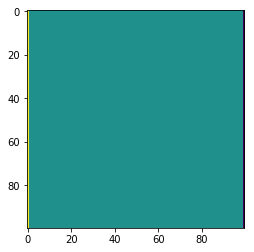

In [102]:
#100 square grid, assuming zero V unless specified
boundaries = np.zeros((100,100))

#
boundaries[:,0] = Vmax
boundaries[:,-1] = -Vmax


# print(boundaries)
plt.imshow(boundaries)
plt.show()

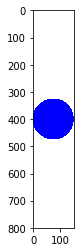

800 609


In [32]:
#testing with example2.png, attempt 1 at reading in geometry of problem
image = mpimg.imread("example2.png")
plt.imshow(image[:,230:380])
plt.show()
# print(np.amax(image[393,:]))
height, width = image.shape[:-1]
print(height, width)

In [21]:
#test for the largest column, discard the others
#potential at any point must be described as either positive, negative or zero, with some scaling from Vmax
Vmax = 100

#setup the final matrix, matching the image dimensions but storing a single value for scaling the voltage
potential = np.zeros((image.shape[0], image.shape[1], 1))


#set max number of columns as 3 (ignore alpha), so will consider 3 indexes: 0,1,2
#then compare to find the largest out of the rgb column values for this point in array
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        #compare the values in each rgb column
        #consider the 1st column as the max value, then test the next and update the max if larger
        #use >= this way if all columns equal, the maxcol will be 2 and get set to zero V
        for col in [1,2]:
            maxcol = 0
            if image[i][j][col] >= image[i][j][maxcol]:
                maxcol = col
                
        #now process the max value appropriately, to go into the potential array
        #use (-1)**maxcol to automatically flip the sign of the voltage, in accordance with red = + & green = -
        if maxcol == 2:
            potential[i][j] = 0
        else:
            potential[i][j] = (-1)**maxcol * Vmax*image[i][j][maxcol]
        
# print(potential[200][100])

In [2]:
#extension to function form
# - read in the image outside in main program
# - function to get boundary conditions from the image
# - and set them each loop of the finite difference
# --- the rgb value boundaries need to be constantly re-set
# --- but the background potentials must only be set during the initialisation of the array
# --- use a flag to check if they have been set


#store the image from the designated file
image = mpimg.imread("example2.png")

#Vmax specified in function call, or defaults to 100V
#setup the final matrix, matching the image dimensions but storing a single value for scaling the voltage
height = image.shape[0]
width = image.shape[1]
potential = np.zeros((height, width, 1))


def setpotential(potential, maxcol = [0]*width*height, Vmax=100):
    #looping over every point in the array
    #test for the largest column, discard the others
    #potential at any point must be described as either positive, negative or zero, with some scaling
    
    
    #set max number of columns as 3 (ignore alpha), so will consider 3 indexes: 0,1,2
    #then compare to find the largest out of the rgb column values for this point in array
    for i in range(height):
        for j in range(width):
            #in the initial run-through, the column comparison must be performed
            #in subsequent runs, save time by storing the maxcol that were found during initialisation
            if initialised == False:
                #array for maxcol will store the maxcol index for each point as a 1D array
                #defined during the initialisation as being all zeros
                #and after initialisation this will be passed to and from the function
                #indexed by i*width + j for a given point in row i & column j
                
                
                #compare the values in each rgb column
                #by getting a list of indexes for any of the columns which hold the max number
                mxindex = [col for col in range(3) if image[i][j][col] == max(image[i][j])]
                
                #then check if there are any that equal - then set maxcol to 3 
                #(just to differentiate ground (index 2) from background zeros (index 3))
                #otherwise check that the alpha channel (index 3) is not the max, as this is irrelevant to the potential values
#                 print(mxindex)
                if len(mxindex) != 1:
                    maxcol[i*width + j] = 3
                else:
                    maxcol[i*width + j] = mxindex[0]
#                     print(maxcol[i*width + j])
            
            
            #now process the max value appropriately, to go into the potential array
            #
            if maxcol[i*width + j] == 3 and initialised == False:
                potential[i][j] = 0
            elif maxcol[i*width + j] == 2:
                potential[i][j] = 0
            elif maxcol[i*width + j] == 1:
                potential[i][j] = - Vmax*image[i][j][maxcol[i*width + j]]
            elif maxcol[i*width + j] == 0:
                potential[i][j] = Vmax*image[i][j][maxcol[i*width + j]]
                
            
    
    return potential, maxcol



initialised = False
potential, maxcol = setpotential(potential)
# print(maxcol)
initialised = True
potential, maxcol = setpotential(potential, maxcol)

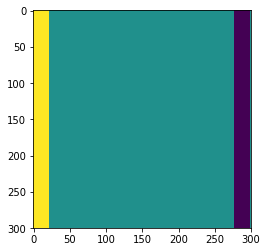

In [7]:
potential, maxcol = setpotential(potential, maxcol)
# print(potential[150,:])
#use .squeeze() to represent shape (i,j,V) as (i,j) for plotting
plt.imshow(potential.squeeze())
plt.show()

In [30]:
### Testing for boolean mask arrays ###
a = np.arange(10)
b = np.ma.array(a > 5)
print(b)
c = 3*np.ones((3,3))
c[1,1] = True
print(c)
print(c[c==True])

[False False False False False False  True  True  True  True]
[[ 3.  3.  3.]
 [ 3.  1.  3.]
 [ 3.  3.  3.]]
[ 1.]


In [15]:
initialised = False
potential, maxcol = setpotential(potential)
mask = np.ma.array(potential)

In [10]:
### adaptation of previous function for mask array ###
#with use of True/False mask array, can instruct that any points included in a boundary are excluded from finite difference
#this way, the values only need to be set initially
#and maxcol list can be ignored beyond initialisation
# - so, in the function, after determining the type (maxcol) of a point, set whether it should be edited or not
# --- then pass the mask array instead of maxcol
# --- maxcol need only be a variable now


def readimage(filename, Vmax=100):
    
    ### Reading image from file ###
    
    #use try/except to handle any problems with the file
    #get the image into an array, then get its dimensions to set up the potential and mask arrays
    #image.shape returns the 3D dimensions, but we only want 2D so exclude the last item
    try:
        image = mpimg.imread(filename)
        height, width = image.shape[:-1]
    except:
        print("Invalid file given. Failed to read any data.")
        return 1,1
        
    #define the arrays we need, matching the image dimensions
    #and initially at zero everywhere
    #also define mask as being an array of zeros, as this is how False is interpreted
    potential = np.zeros((height, width))
    mask = np.zeros((height, width))
    
    
    #Now go through each pixel of the image and determine the boundaries
    for i in range(height):
        for j in range(width):
            mxindex = [col for col in range(3) if image[i][j][col] == max(image[i][j][:3])]

            if len(mxindex) != 1:
                maxcol = 3
            else:
                maxcol = mxindex[0]
            
            if maxcol == 3:
                potential[i][j] = 0
                mask[i][j] = True
            elif maxcol == 2:
                potential[i][j] = 0
            elif maxcol == 1:
                potential[i][j] = - Vmax*image[i][j][maxcol]
            elif maxcol == 0:
                potential[i][j] = Vmax*image[i][j][maxcol]
            
            if not filename.endswith("png"):
                potential[i][j] /= 255
    
    
    
        
    return potential, mask

In [5]:
potential, mask = readimage("cylinderInitial.png",1000)
# print(potential[:,50],"\n", mask[:,50])
# print(np.amax(potential[283,:]))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


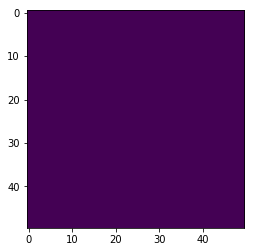

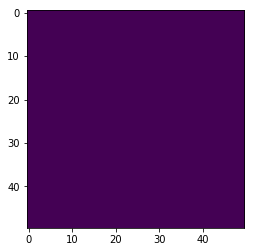

In [19]:
print(potential[:,69])
plt.imshow(potential.squeeze())
plt.show()
plt.imshow(mask)
plt.show()

In [15]:
potential, mask = readimage("testimg2.png", 1000)

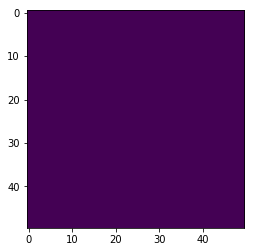

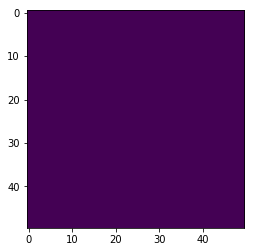

In [21]:
plt.imshow(potential.squeeze())
plt.show()
plt.imshow(mask)
plt.show()

In [52]:
#testing a way to operate over whole array in finite difference calculation (in python)
#using np.where(), test points are True in mask array and perform operation if True
#else, leave them unedited
#don't know how to use the surrounding points for setting new values though
potential = np.where(mask == True, potential, potential)
print(potential[150,:])

[ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.  

In [128]:
#finite difference test
for n in range(20):
    for i in range(height):
        for j in range(width):
            if mask[i][j] == True and i != height-1 and j!= width-1:
                potential[i][j] = (potential[i-1][j] + potential[i+1][j] + potential[i][j-1] + potential[i][j+1])/4
            
print(potential[300,:])
#sound

[  0.00000000e+000   0.00000000e+000   2.45341202e-019   1.32323341e-017
   3.50389015e-016   6.08129730e-015   7.79398157e-014   7.88009326e-013
   6.55673119e-012   4.62444371e-011   2.82573674e-010   1.52123397e-009
   7.31181094e-009   3.17171380e-008   1.25274790e-007   4.53917500e-007
   1.51845395e-006   4.71559133e-006   1.36611901e-005   3.70797144e-005
   9.46613837e-005   2.28108855e-004   5.20556095e-004   1.12842859e-003
   2.33027950e-003   4.59679328e-003   8.68482719e-003   1.57567055e-002
   2.75265907e-002   4.64444792e-002   7.59534508e-002   1.20900334e-001
   1.88224565e-001   2.88035782e-001   4.35033720e-001   6.49889949e-001
   9.59813143e-001   1.39733163e+000   1.99663809e+000   2.78773209e+000
   3.78984498e+000   5.00697612e+000   6.43044942e+000   8.06104642e+000
   1.00000000e+001   1.00000000e+001   1.00000000e+001   1.00000000e+001
   1.00000000e+001   1.00000000e+001   1.00000000e+001   1.00000000e+001
   1.00000000e+001   1.00000000e+001   1.00000000e+

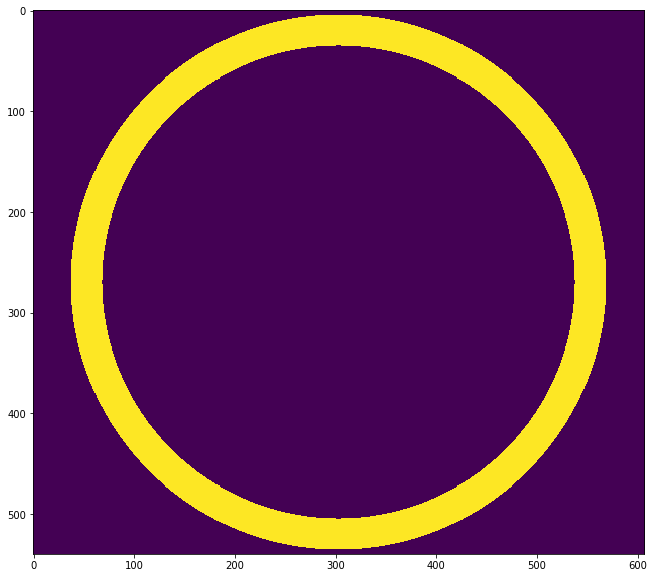

In [76]:
plt.figure(figsize=(20,10))
plt.imshow(potential.squeeze())
plt.show()

In [9]:
#practise using subprocess to run commands on command line
#testing on the output files, see that the data is delimited by "\n" 
#("-1" argument reads 1 line), and there are 300 numbers in the line
cmd = ["head", "-1", "potentialarrayC.txt"]
# output = subprocess.check_output(cmd)
output = subprocess.check_output(["ls","-l"])

print(len(output.split()))
print(output.decode("UTF-8"))

380
total 49868
-rw-r--r--. 1 2315629g ug     372 Jan 30 14:18 boundaries.png
-rw-r--r--. 1 2315629g ug   10206 Feb 25 13:42 control.ipynb
-rw-r--r--. 1 2315629g ug   59138 Feb 25 13:27 eg1.png
-rw-r--r--. 1 2315629g ug   61424 Feb 25 13:28 eg2.png
-rw-r--r--. 1 2315629g ug  980017 Feb 25 13:13 electricField.dat
-rwxr-xr-x. 1 2315629g ug   13792 Feb 18 14:12 example
-rw-r--r--. 1 2315629g ug   16956 Feb 13 11:50 example1.png
-rw-r--r--. 1 2315629g ug    5351 Feb 13 11:42 example2.png
-rw-r--r--. 1 2315629g ug    1341 Jan 23 12:36 example.cc
-rw-r--r--. 1 2315629g ug   16313 Feb  4 11:51 flowers.jpg
-rw-r--r--. 1 2315629g ug  229581 Feb 25 13:32 imageread.ipynb
-rw-r--r--. 1 2315629g ug   11875 Feb 18 15:21 laplace.dat
-rw-r--r--. 1 2315629g ug 4165020 Feb 18 12:19 maskarrayA.txt
-rw-r--r--. 1 2315629g ug 4131000 Feb 18 12:19 maskarrayB.txt
-rw-r--r--. 1 2315629g ug 3892860 Feb 18 12:18 maskarrayC.txt
-rw-r--r--. 1 2315629g ug 2950020 Feb 18 12:19 maskarrayEx1.txt
-rw-r--r--. 1 2315629g

In [3]:
#command for compiling c++ file
comp = [r"/usr/bin/g++", "-Wall", "-o", "test", "test.cc"]

#use subprocess to perform command
#two branches available, first one for if compilation fails; second for running program
#output and error are both returned by p.communicate(), but only want to show the relevant one
#if compilation failed, print out the error message from stderr
#if successful, move to running the program
#printing output if there are no errors returned
p = subprocess.Popen(comp, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
output, error = p.communicate()
output = output.decode("UTF-8")
error = error.decode("UTF-8")
if error != "":
    print("Failed to compile")
    print(error)
else:
    p = subprocess.Popen(["./test"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = p.communicate()
    output = output.decode("UTF-8")
    error = error.decode("UTF-8")
    if error != "":
        print(error)
    else:
        print(output)



FileNotFoundError: [WinError 2] The system cannot find the file specified

In [4]:
cd = [r"/usr/bin/cd", "~/Physics3Labs/GroupProjectStuff/P3-group-master"]
p = subprocess.Popen(cd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
out, err = p.communicate()
out = out.decode("UTF-8")
err = err.decode("UTF-8")
print(err)

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [7]:
# function form
def compilec(cfile, outfile):
    
    comp = ["cmd", r"/usr/bin/g++", "-o", outfile, cfile]
        
    p = subprocess.Popen(comp, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = p.communicate()
    output = output.decode("UTF-8")
    error = error.decode("UTF-8")
    if error != "":
        print("Failed to compile")
        print(error)
    else:
        p = subprocess.Popen(["./" + outfile], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        output, error = p.communicate()
        output = output.decode("UTF-8")
        error = error.decode("UTF-8")
        if error != "":
            print(error)
        else:
            print(output)
    
    return

compilec("example.cc", "example")

OSError: [WinError 193] %1 is not a valid Win32 application

In [8]:
pwd = subprocess.check_output("pwd")
pwd = pwd.decode("UTF-8")
print(pwd)

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [4]:
with subprocess.Popen(["which", "which"] ,stdout=subprocess.PIPE, stderr=subprocess.PIPE) as p:
    output, error = p.communicate()
    output = output.decode("UTF-8")
    error = error.decode("UTF-8")
    if error != "":
        print(error)
    else:
        print(output)

/usr/bin/which



In [6]:
p = subprocess.Popen(["/opt/mathematica/bin/math","-script", "pythontest.m"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
output, error = p.communicate()
output = output.decode("UTF-8")
error = error.decode("UTF-8")
if error != "":
    print(error)
else:
    print(output)

3



[2]


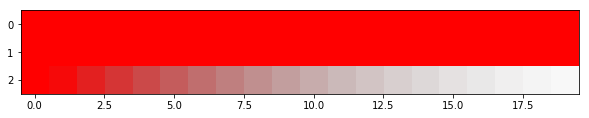

In [107]:
img = mpimg.imread('example1.png')



np.savetxt("image.txt", img[20:30][270:330], fmt="%f")

mxindex = [col for col in range(3) if img[:,244][256][col] == max(img[:,244][256][:3])]
print(mxindex)
# print(max(img[:,244][256]))




plt.figure(figsize=(10,10))
# plt.imshow(img[250:300, 243:280])

plt.imshow(img[30,280:300])
plt.show()